In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#importing data
labeledData = pd.read_csv('iBeacon_RSSI_Labeled.csv')

In [3]:
#testing data types to make sure they're appropriate for manipulation
labeledData.dtypes

location    object
date        object
b3001        int64
b3002        int64
b3003        int64
b3004        int64
b3005        int64
b3006        int64
b3007        int64
b3008        int64
b3009        int64
b3010        int64
b3011        int64
b3012        int64
b3013        int64
dtype: object

In [4]:
#checking that the columns line up correctly with the data
labeledData.head(5)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [5]:
#checking for impossible values
labeledData.loc[labeledData['location'] == 'X15']

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013


In [6]:
#found values that were not on the map
labeledData[labeledData.location == 'W15']

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
401,W15,10-18-2016 10:54:38,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-199,-61
402,W15,10-18-2016 10:54:36,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-199,-62
403,W15,10-18-2016 10:54:34,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-75
404,W15,10-18-2016 10:54:32,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-199,-71
405,W15,10-18-2016 10:54:30,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-199,-67
406,W15,10-18-2016 10:54:28,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-75
632,W15,10-4-2016 10:50:15,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-71
633,W15,10-4-2016 10:49:54,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-59
634,W15,10-4-2016 10:49:51,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-62
635,W15,10-4-2016 10:49:27,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-71


In [7]:
labeledData[labeledData.location == 'V15']

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
624,V15,10-4-2016 10:50:58,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-81
625,V15,10-4-2016 10:50:56,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-77
626,V15,10-4-2016 10:50:45,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-64
627,V15,10-4-2016 10:50:43,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-60
628,V15,10-4-2016 10:50:31,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-63
629,V15,10-4-2016 10:50:28,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-67
630,V15,10-4-2016 10:50:24,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-63
631,V15,10-4-2016 10:50:23,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-65


In [8]:
#lines [9] to [30] checking columns for typos, whitespace upper/lower case errors etc.
labeledData['b3001'].value_counts()

-200    1395
-78        5
-80        4
-81        3
-77        3
-79        2
-75        1
-74        1
-73        1
-72        1
-71        1
-70        1
-68        1
-67        1
Name: b3001, dtype: int64

In [9]:
labeledData['b3001'].shape

(1420,)

In [10]:
labeledData['b3002'].value_counts()

-200    923
-80      34
-78      34
-77      32
-75      31
-76      31
-74      29
-81      28
-79      27
-72      27
-66      25
-73      25
-65      23
-70      19
-67      18
-71      17
-68      16
-69      15
-64      14
-63      12
-198     11
-62       6
-82       5
-84       3
-83       3
-60       3
-86       2
-85       2
-61       2
-59       2
-87       1
Name: b3002, dtype: int64

In [11]:
labeledData['b3002'].shape

(1420,)

In [12]:
labeledData['b3003'].value_counts()

-200    1140
-79       35
-78       32
-80       27
-81       23
-75       22
-76       21
-77       17
-82       13
-74       13
-72        9
-71        7
-69        6
-70        5
-66        5
-64        5
-63        5
-73        5
-61        4
-83        3
-68        3
-85        3
-60        3
-67        2
-65        2
-86        2
-87        2
-62        2
-88        1
-84        1
-57        1
-56        1
Name: b3003, dtype: int64

In [13]:
labeledData['b3003'].shape

(1420,)

In [14]:
labeledData['b3004'].value_counts()

-200    1018
-78       45
-77       42
-76       37
-81       29
-80       27
-75       24
-70       24
-72       24
-79       24
-74       23
-71       22
-69       16
-73       14
-67       10
-82        7
-66        6
-61        4
-65        4
-68        3
-62        3
-86        2
-64        2
-63        2
-59        2
-57        2
-88        1
-84        1
-60        1
-56        1
Name: b3004, dtype: int64

In [15]:
labeledData['b3004'].shape

(1420,)

In [16]:
labeledData['b3005'].value_counts()

-200    1173
-78       31
-80       26
-73       21
-81       20
-75       19
-79       18
-72       17
-74       17
-77       17
-76       16
-82        8
-70        7
-68        7
-66        5
-83        4
-69        4
-61        4
-71        2
-63        2
-60        2
Name: b3005, dtype: int64

In [17]:
labeledData['b3005'].shape

(1420,)

In [18]:
labeledData['b3006'].value_counts()

-200    1133
-78       45
-77       44
-80       33
-76       28
-79       21
-75       20
-81       13
-73       13
-74       12
-72       10
-82        7
-71        6
-69        5
-67        5
-70        4
-68        4
-66        4
-87        3
-84        3
-83        3
-86        2
-63        1
-62        1
Name: b3006, dtype: int64

In [19]:
labeledData['b3006'].shape

(1420,)

In [20]:
labeledData['b3007'].value_counts()

-200    1370
-79       11
-81        7
-80        7
-82        4
-64        4
-78        3
-71        2
-63        2
-76        2
-72        1
-85        1
-67        1
-66        1
-77        1
-84        1
-62        1
-58        1
Name: b3007, dtype: int64

In [21]:
labeledData['b3007'].shape

(1420,)

In [22]:
labeledData['b3008'].value_counts()

-200    1329
-78       11
-77       10
-81        8
-80        8
-79        8
-72        5
-73        4
-70        4
-76        4
-74        4
-71        3
-82        3
-75        2
-69        2
-67        2
-64        2
-63        2
-62        2
-83        1
-68        1
-66        1
-65        1
-61        1
-60        1
-56        1
Name: b3008, dtype: int64

In [23]:
labeledData['b3008'].shape

(1420,)

In [24]:
labeledData['b3009'].value_counts()

-200    1389
-78        3
-77        3
-73        2
-56        2
-58        2
-59        2
-72        2
-71        2
-81        2
-74        1
-82        1
-70        1
-66        1
-65        1
-61        1
-60        1
-75        1
-76        1
-57        1
-55        1
Name: b3009, dtype: int64

In [25]:
labeledData['b3009'].shape

(1420,)

In [26]:
labeledData['b3010'].value_counts()

-200    1391
-78        7
-81        4
-79        3
-72        3
-80        2
-77        2
-66        2
-75        1
-69        1
-67        1
-65        1
-62        1
-61        1
Name: b3010, dtype: int64

In [27]:
labeledData['b3010'].shape

(1420,)

In [28]:
labeledData['b3011'].value_counts()

-200    1395
-79        3
-81        2
-76        2
-75        2
-61        2
-85        2
-69        2
-67        1
-62        1
-64        1
-66        1
-70        1
-68        1
-71        1
-72        1
-73        1
-59        1
Name: b3011, dtype: int64

In [29]:
labeledData['b3011'].shape

(1420,)

In [30]:
labeledData['b3012'].value_counts()

-200    1385
-81        8
-199       4
-61        2
-67        2
-68        2
-60        2
-79        2
-80        2
-82        2
-77        1
-76        1
-78        1
-73        1
-66        1
-65        1
-63        1
-62        1
-74        1
Name: b3012, dtype: int64

In [31]:
labeledData['b3012'].shape

(1420,)

In [32]:
labeledData['b3013'].value_counts()

-200    1376
-81        8
-75        4
-79        4
-71        4
-67        3
-62        3
-78        2
-77        2
-76        2
-63        2
-61        2
-82        1
-85        1
-87        1
-66        1
-65        1
-64        1
-60        1
-59        1
Name: b3013, dtype: int64

In [33]:
labeledData['b3013'].shape

(1420,)

In [34]:
labeledData['location'].value_counts()

K04    34
J04    32
J06    29
I06    27
J07    27
       ..
E15     4
L08     3
S15     3
L09     2
O01     2
Name: location, Length: 105, dtype: int64

In [35]:
labeledData['location'].shape

(1420,)

In [36]:
labeledData.loc[labeledData['location'] == 'V15'].shape

(8, 15)

In [37]:
labeledData.loc[labeledData['location'] == 'W15'].shape

(17, 15)

In [38]:
#decided to take these values as impossible and drop them 
dx = labeledData[labeledData.location == 'V15']
dy = labeledData[labeledData.location == 'W15']
print(dx.index)
print(dy.index)

labeledData = labeledData.drop(dx.index)
labeledData = labeledData.drop(dy.index)

Int64Index([624, 625, 626, 627, 628, 629, 630, 631], dtype='int64')
Int64Index([401, 402, 403, 404, 405, 406, 632, 633, 634, 635, 636, 862, 863,
            864, 865, 866, 867],
           dtype='int64')


In [39]:
labeledData[labeledData.location == 'W15']

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013


In [40]:
labeledData[labeledData.location == 'V15']

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013


In [41]:
#checking for outliers and to make sure the shape of each column is the same
labeledData.describe()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000
mean,-197.786380,-155.846595,-175.094624,-163.898925,-177.990681,-174.616487,-195.559140,-191.826523,-197.093907,-197.396416,-197.708244,-197.187097,-198.367025
std,16.401621,60.471991,49.784799,56.826176,47.507206,49.925826,23.077716,30.989122,19.327404,17.896678,17.000259,18.703228,13.905246
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
50%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
75%,-200.000000,-78.000000,-200.000000,-80.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
max,-67.000000,-59.000000,-56.000000,-56.000000,-60.000000,-62.000000,-58.000000,-56.000000,-55.000000,-61.000000,-59.000000,-60.000000,-76.000000


In [42]:
labeledData.shape

(1395, 15)

In [43]:
labeledData['location'].shape

(1395,)

In [44]:
labeledData

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,I01,4-19-2016 9:37:46,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,I01,4-19-2016 9:37:39,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,I01,4-19-2016 9:37:36,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,I01,4-19-2016 9:37:26,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [45]:
#decided the date column was irrelevant to our classifier and subsequently dropped it
beaconData = labeledData.drop(['date', 'location'], axis = 1)
locationData = labeledData['location']

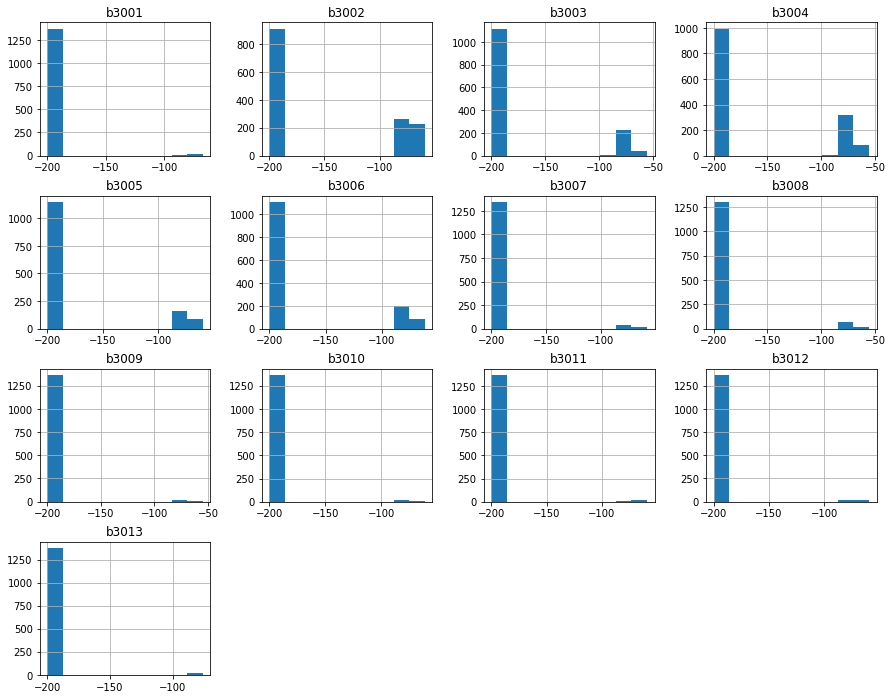

In [46]:
# [47-48] exploring each column with a histogram for inital review
import matplotlib.pyplot as plt 
beaconData.hist(figsize=(15,12))
plt.show()

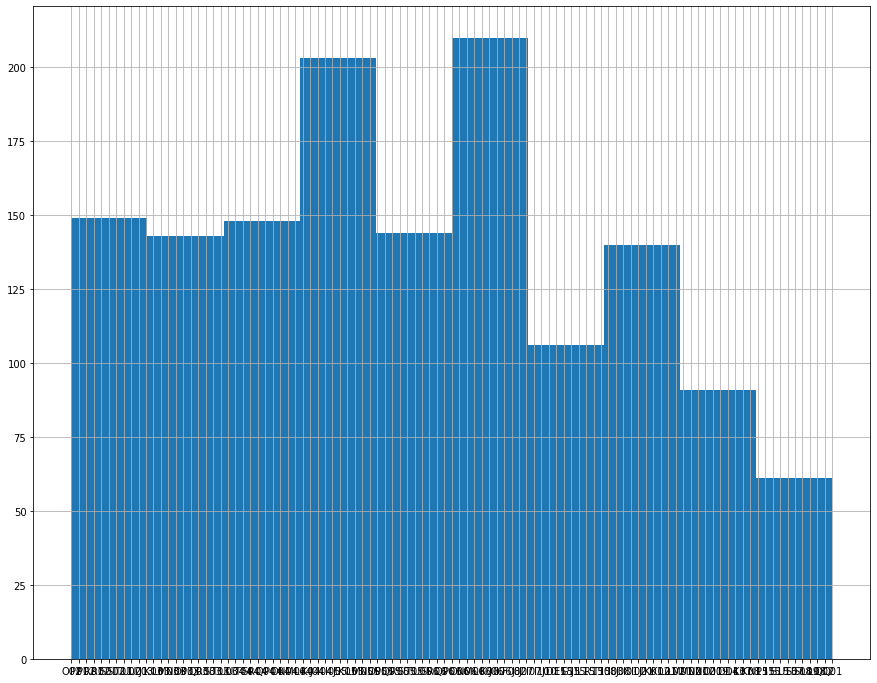

In [47]:
#location column histogram, too big for report but interesting to see
import matplotlib.pyplot as plt 
locationData.hist(figsize=(15,12))
plt.show()

In [48]:
b1b2 = beaconData[['b3001', 'b3002']]

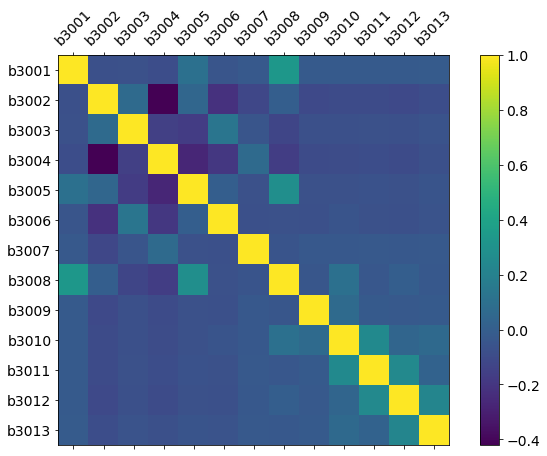

In [49]:
#Beacon correlation to explore relationships
f = plt.figure(figsize=(11, 7))
plt.matshow(beaconData.corr(), fignum=f.number)
plt.xticks(range(beaconData.shape[1]), beaconData.columns, fontsize=14, rotation=45)
plt.yticks(range(beaconData.shape[1]), beaconData.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [50]:
x = locationData.value_counts()
x.sort_values()

O01     2
L09     2
L08     3
S15     3
Q06     4
       ..
J07    27
I07    27
J06    29
J04    32
K04    34
Name: location, Length: 103, dtype: int64

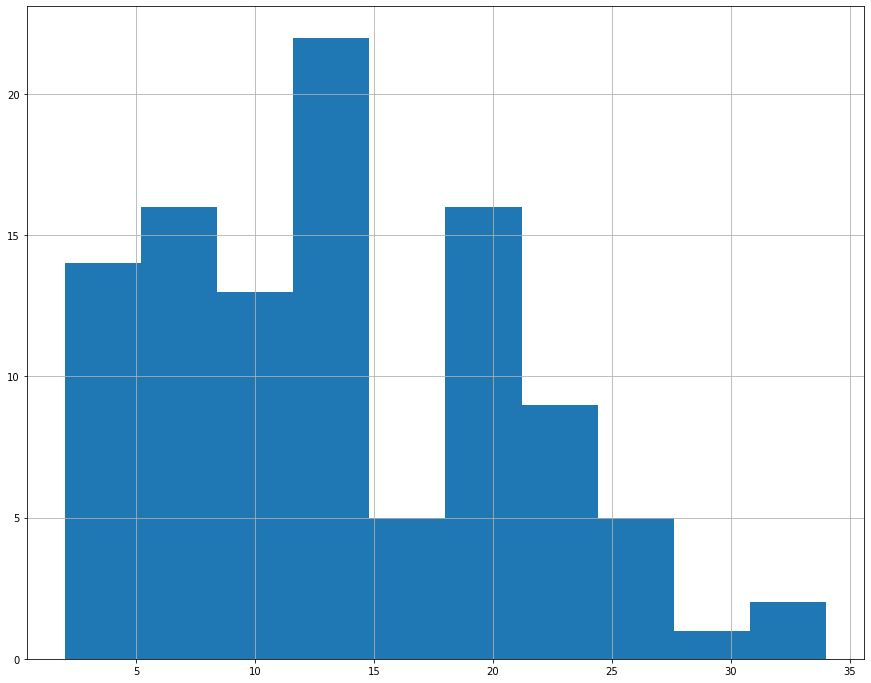

In [51]:
x
import matplotlib.pyplot as plt 
x.hist(figsize=(15,12))
plt.show()

In [52]:
#checking frequency in which each grid location was visited
ldCount = labeledData[labeledData.groupby('location')['location'].transform('size')>15]

In [53]:
ldCount

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
13,R02,10-18-2016 11:14:55,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200,-200,-200
14,R02,10-18-2016 11:14:53,-200,-200,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200
15,R02,10-18-2016 11:14:51,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200,-200,-200
16,R02,10-18-2016 11:14:49,-200,-200,-200,-74,-200,-200,-200,-200,-200,-200,-200,-200,-200
17,R02,10-18-2016 11:14:47,-200,-200,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,I01,4-19-2016 9:37:46,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,I01,4-19-2016 9:37:39,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,I01,4-19-2016 9:37:36,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,I01,4-19-2016 9:37:26,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


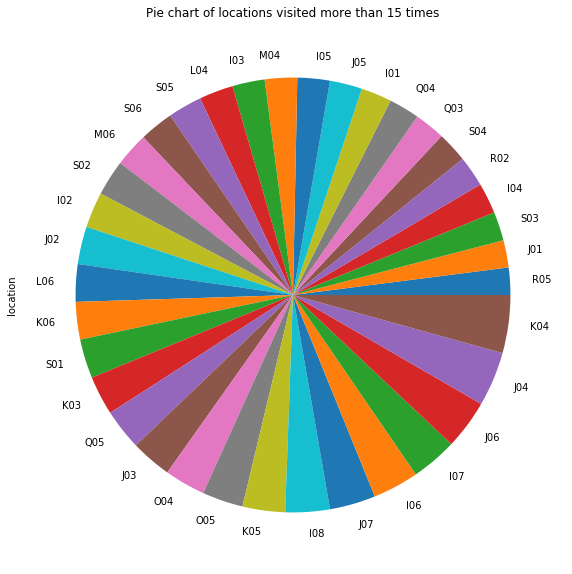

In [54]:
#pie chart of most visited grid locations
import matplotlib.pyplot as plt
ldCount['location'].value_counts(ascending=True).plot.pie(figsize=(30,10))
plt.title('Pie chart of locations visited more than 15 times')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000195148BCF08>,
      dtype=object)

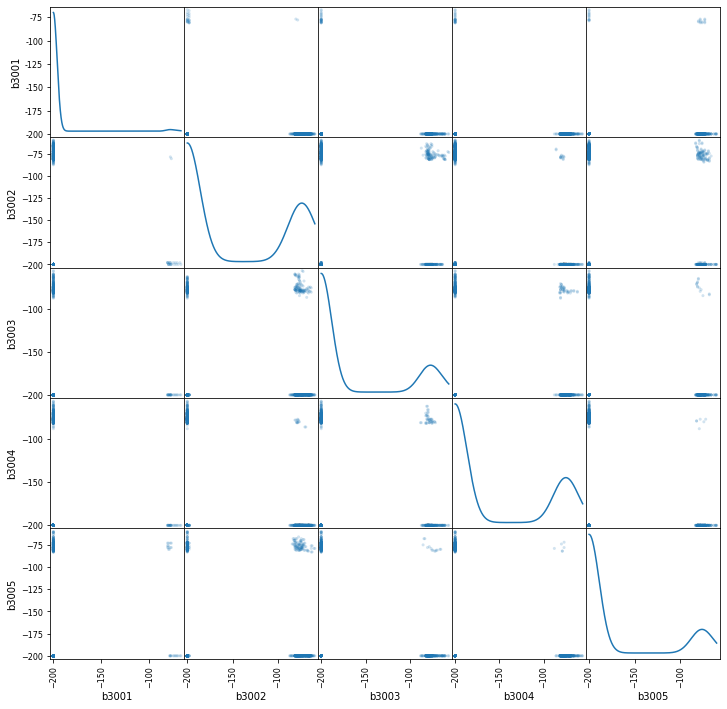

In [55]:
#exploring each beacon with a scatter matrix and kernel density estimation
from pandas.plotting import scatter_matrix
scX = beaconData[['b3001','b3002','b3003','b3004','b3005']]
scatter_matrix(scX, alpha=0.2, figsize=(12, 12), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019514736088>,
      dtype=object)

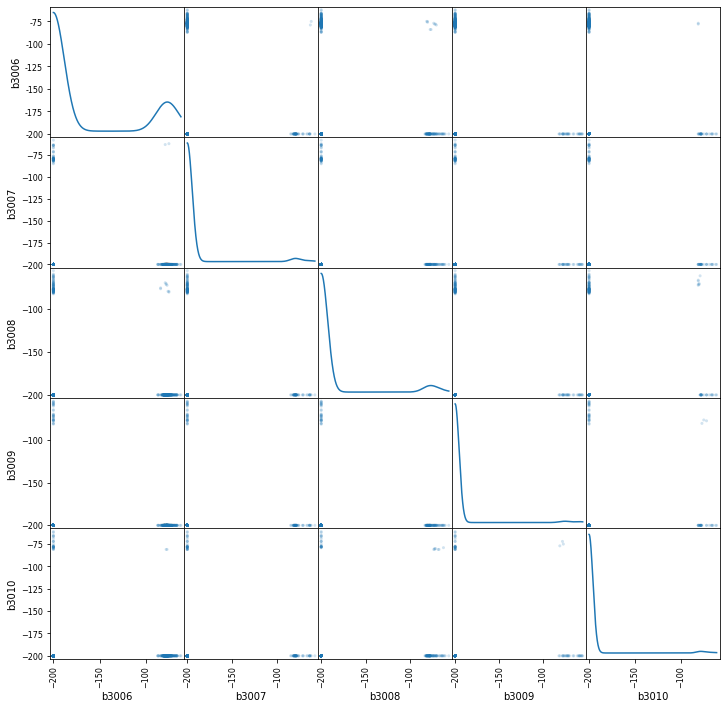

In [56]:
from pandas.plotting import scatter_matrix
scX = beaconData[['b3006','b3007','b3008','b3009','b3010']]
scatter_matrix(scX, alpha=0.2, figsize=(12, 12), diagonal='kde')

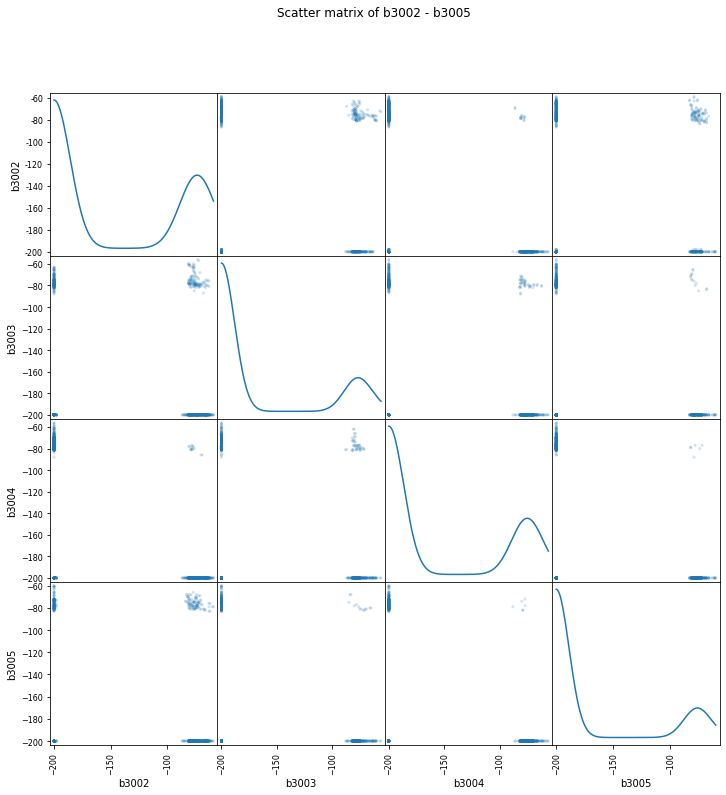

In [57]:
#exploring most active beacons more closely
from pandas.plotting import scatter_matrix
scX = beaconData[['b3002','b3003','b3004','b3005']]
scatter_matrix(scX, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter matrix of b3002 - b3005')

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019516CB3088>,
      dtype=object)

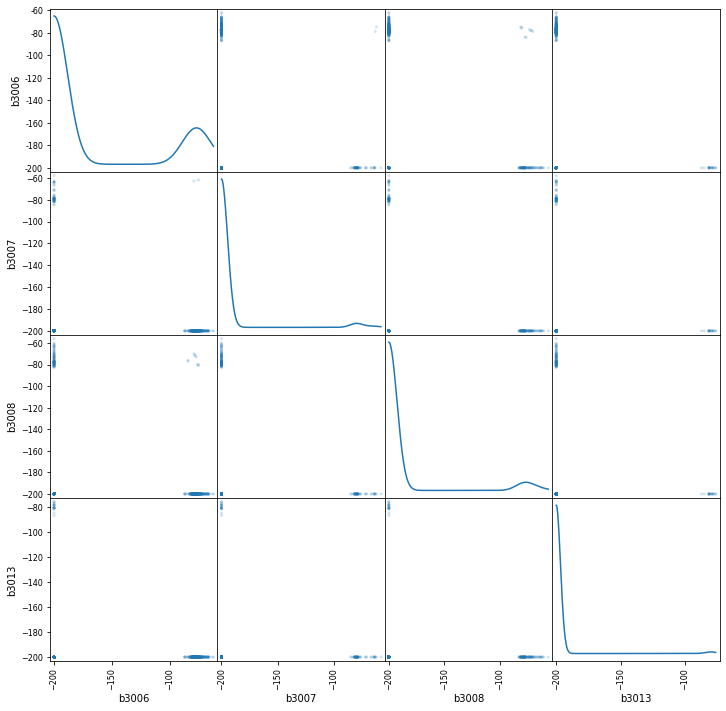

In [58]:
from pandas.plotting import scatter_matrix
scX = beaconData[['b3006', 'b3007', 'b3008', 'b3013']]
scatter_matrix(scX, alpha=0.2, figsize=(12, 12), diagonal='kde')

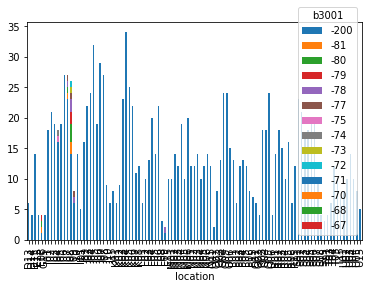

In [59]:
#comparing location against b3001 beacon
import matplotlib.pyplot as plt
import pandas as pd

labeledData.groupby(['location','b3001']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

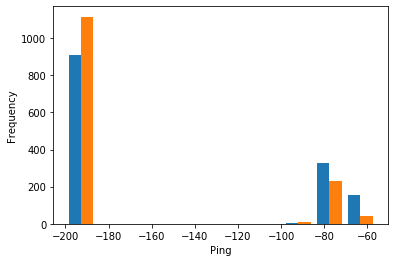

In [60]:
#comparing column pairs
from matplotlib.ticker import FuncFormatter

plt.xlabel("Ping")
plt.ylabel("Frequency")

i = labeledData['b3002']
j = labeledData['b3003']

N = 6
ind = np.arange(N)

#plt.xticks(x, ('0', 'I', 'II', 'III', 'IV', 'V', 'VI'))
plt.hist([i,j], bins=10)

plt.show()

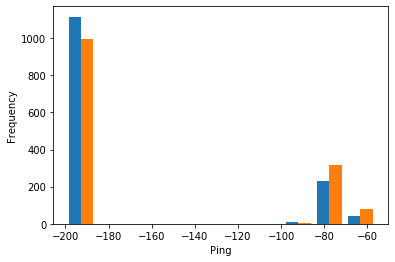

In [61]:
#comparing column pairs
from matplotlib.ticker import FuncFormatter

plt.xlabel("Ping")
plt.ylabel("Frequency")

i = labeledData['b3003']
j = labeledData['b3004']

N = 6
ind = np.arange(N)

#plt.xticks(x, ('0', 'I', 'II', 'III', 'IV', 'V', 'VI'))
plt.hist([i,j], bins=10)

plt.show()

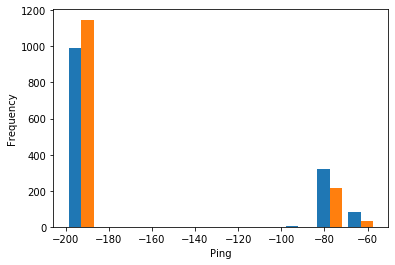

In [62]:
#comparing column pairs
from matplotlib.ticker import FuncFormatter

plt.xlabel("Ping")
plt.ylabel("Frequency")

i = labeledData['b3004']
j = labeledData['b3005']

N = 6
ind = np.arange(N)

#plt.xticks(x, ('0', 'I', 'II', 'III', 'IV', 'V', 'VI'))
plt.hist([i,j], bins=10)

plt.show()

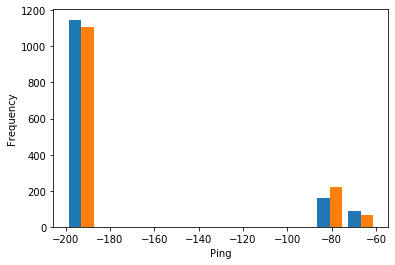

In [63]:
#comparing column pairs
from matplotlib.ticker import FuncFormatter

plt.xlabel("Ping")
plt.ylabel("Frequency")

i = labeledData['b3005']
j = labeledData['b3006']

N = 6
ind = np.arange(N)

#plt.xticks(x, ('0', 'I', 'II', 'III', 'IV', 'V', 'VI'))
plt.hist([i,j], bins=10)

plt.show()

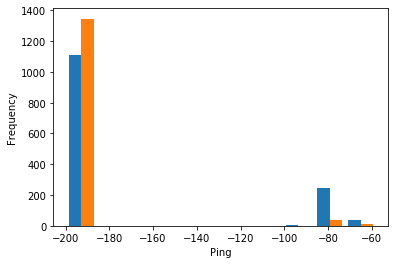

In [64]:
#comparing column pairs
from matplotlib.ticker import FuncFormatter

plt.xlabel("Ping")
plt.ylabel("Frequency")

i = labeledData['b3006']
j = labeledData['b3007']

N = 6
ind = np.arange(N)

#plt.xticks(x, ('0', 'I', 'II', 'III', 'IV', 'V', 'VI'))
plt.hist([i,j], bins=10)

plt.show()

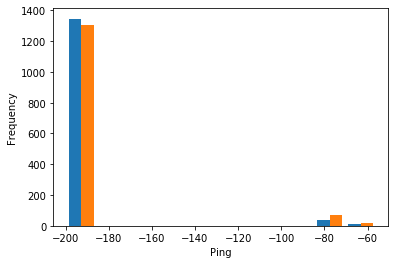

In [65]:
#comparing column pairs
from matplotlib.ticker import FuncFormatter

plt.xlabel("Ping")
plt.ylabel("Frequency")

i = labeledData['b3007']
j = labeledData['b3008']

N = 6
ind = np.arange(N)

#plt.xticks(x, ('0', 'I', 'II', 'III', 'IV', 'V', 'VI'))
plt.hist([i,j], bins=10)

plt.show()

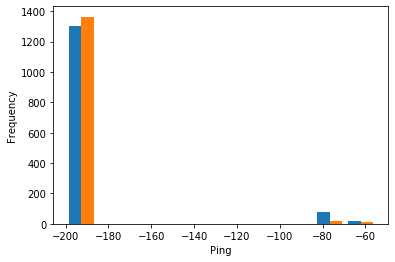

In [66]:
#comparing column pairs
from matplotlib.ticker import FuncFormatter

plt.xlabel("Ping")
plt.ylabel("Frequency")

i = labeledData['b3008']
j = labeledData['b3009']

N = 6
ind = np.arange(N)

#plt.xticks(x, ('0', 'I', 'II', 'III', 'IV', 'V', 'VI'))
plt.hist([i,j], bins=10)

plt.show()

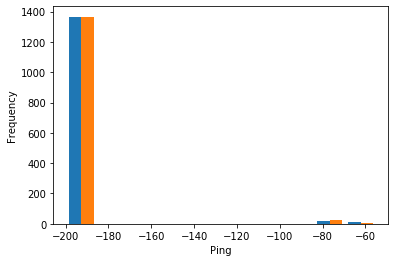

In [67]:
#comparing column pairs
from matplotlib.ticker import FuncFormatter

plt.xlabel("Ping")
plt.ylabel("Frequency")

i = labeledData['b3009']
j = labeledData['b3010']

N = 6
ind = np.arange(N)

#plt.xticks(x, ('0', 'I', 'II', 'III', 'IV', 'V', 'VI'))
plt.hist([i,j], bins=10)

plt.show()

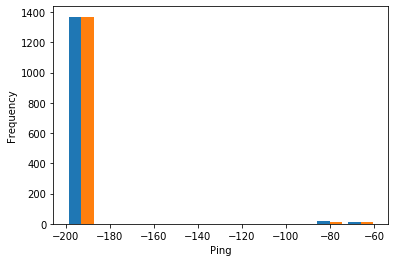

In [68]:
#comparing column pairs
from matplotlib.ticker import FuncFormatter

plt.xlabel("Ping")
plt.ylabel("Frequency")

i = labeledData['b3010']
j = labeledData['b3011']

N = 6
ind = np.arange(N)

#plt.xticks(x, ('0', 'I', 'II', 'III', 'IV', 'V', 'VI'))
plt.hist([i,j], bins=10)

plt.show()

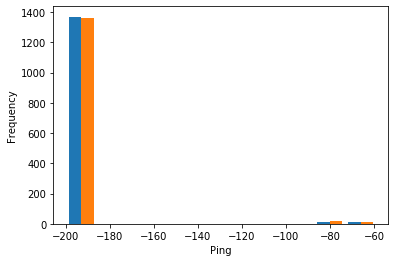

In [69]:
#after seeing each ascending column pair it is clear that their 
#geographical location directly correlates to their neighbours RSSI readings
from matplotlib.ticker import FuncFormatter

plt.xlabel("Ping")
plt.ylabel("Frequency")

i = labeledData['b3011']
j = labeledData['b3012']

N = 6
ind = np.arange(N)

#plt.xticks(x, ('0', 'I', 'II', 'III', 'IV', 'V', 'VI'))
plt.hist([i,j], bins=10)

plt.show()

In [70]:
#making copies of beacon data to manipulate in different ways, e.g normalization and scalings
normalBeaconData = beaconData.copy()
maxminBeaconData = beaconData.copy()
standardBeaconData = beaconData.copy()

In [71]:
normalBeaconData

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [72]:
maxminBeaconData

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [73]:
standardBeaconData

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [74]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
normalBeaconData[:] = normalizer.fit_transform(normalBeaconData[:])
normalBeaconData.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863,-0.111877,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863
1,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863,-0.111877,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863
2,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.110460,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909
3,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.110460,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909
4,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.110460,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909


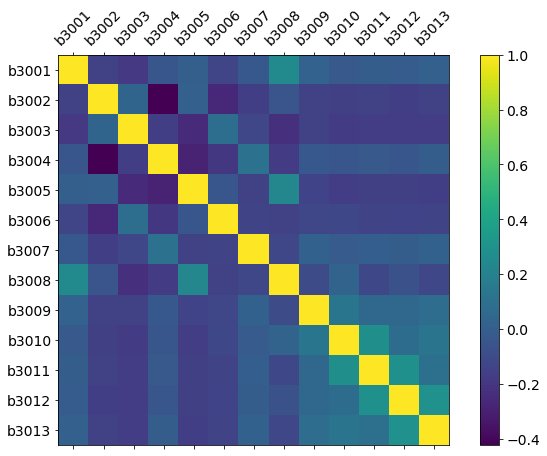

In [75]:
#checkingBeacon correlation after manipulation
f = plt.figure(figsize=(11, 7))
plt.matshow(normalBeaconData.corr(), fignum=f.number)
plt.xticks(range(normalBeaconData.shape[1]), normalBeaconData.columns, fontsize=14, rotation=45)
plt.yticks(range(normalBeaconData.shape[1]), normalBeaconData.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [76]:
beaconData

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [77]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
maxminBeaconData[:] = min_max_scaler.fit_transform(beaconData[:])
maxminBeaconData.head(10)

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,0.0,0.0,0.000000,0.000000,0.0,0.884058,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.884058,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.819444,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.833333,0.000000,0.0,0.891304,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.791667,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.000000,0.868056,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.000000,0.868056,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


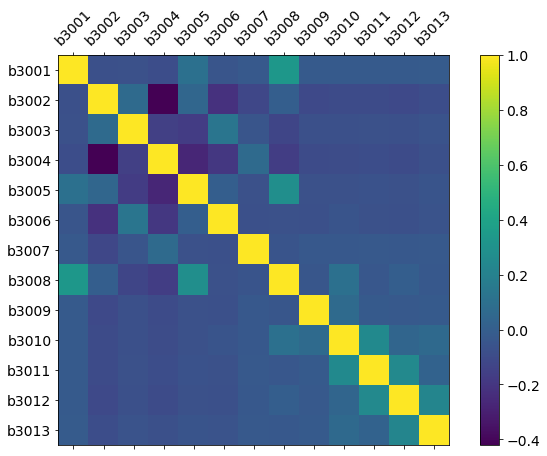

In [78]:
#Beacon correlation
f = plt.figure(figsize=(11, 7))
plt.matshow(maxminBeaconData.corr(), fignum=f.number)
plt.xticks(range(maxminBeaconData.shape[1]), maxminBeaconData.columns, fontsize=14, rotation=45)
plt.yticks(range(maxminBeaconData.shape[1]), maxminBeaconData.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [79]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
standardScaler = preprocessing.StandardScaler()
standardBeaconData[:] = standardScaler.fit_transform(beaconData[:])
standardBeaconData.head(10)

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-0.135012,-0.730408,-0.500440,-0.635517,-0.46345,1.935895,-0.1925,-0.263848,-0.150415,-0.145531,-0.134855,-0.150451,-0.117478
1,-0.135012,-0.730408,-0.500440,-0.635517,-0.46345,1.935895,-0.1925,-0.263848,-0.150415,-0.145531,-0.134855,-0.150451,-0.117478
2,-0.135012,-0.730408,-0.500440,-0.635517,-0.46345,1.955931,-0.1925,-0.263848,-0.150415,-0.145531,-0.134855,-0.150451,-0.117478
3,-0.135012,-0.730408,-0.500440,-0.635517,-0.46345,1.955931,-0.1925,-0.263848,-0.150415,-0.145531,-0.134855,-0.150451,-0.117478
4,-0.135012,-0.730408,-0.500440,-0.635517,-0.46345,1.955931,-0.1925,-0.263848,-0.150415,-0.145531,-0.134855,-0.150451,-0.117478
5,-0.135012,-0.730408,1.870611,-0.635517,-0.46345,-0.508607,-0.1925,-0.263848,-0.150415,-0.145531,-0.134855,-0.150451,-0.117478
6,-0.135012,-0.730408,1.910799,-0.635517,-0.46345,1.955931,-0.1925,-0.263848,-0.150415,-0.145531,-0.134855,-0.150451,-0.117478
7,-0.135012,-0.730408,1.790237,-0.635517,-0.46345,-0.508607,-0.1925,-0.263848,-0.150415,-0.145531,-0.134855,-0.150451,-0.117478
8,-0.135012,-0.730408,-0.500440,1.564962,-0.46345,-0.508607,-0.1925,-0.263848,-0.150415,-0.145531,-0.134855,-0.150451,-0.117478
9,-0.135012,-0.730408,-0.500440,1.564962,-0.46345,-0.508607,-0.1925,-0.263848,-0.150415,-0.145531,-0.134855,-0.150451,-0.117478


In [80]:
x = beaconData
y = locationData

In [81]:
#initial data split into training and testing for classifier building
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [82]:
X_train

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
1152,-200,-200,-66,-200,-200,-79,-200,-200,-200,-200,-200,-200,-200
766,-200,-65,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
349,-200,-72,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200
1189,-200,-200,-200,-71,-200,-200,-200,-200,-200,-200,-200,-200,-200
1199,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-200,-200,-200,-200,-76,-200,-200,-64,-200,-200,-200,-200,-200
267,-200,-200,-200,-81,-200,-200,-200,-200,-200,-200,-200,-200,-200
742,-200,-80,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1376,-200,-200,-80,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [83]:
X_test

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
1317,-200,-200,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200
1012,-200,-200,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200
518,-79,-198,-200,-200,-200,-200,-200,-79,-200,-200,-200,-200,-200
684,-200,-200,-200,-200,-200,-200,-64,-200,-200,-200,-200,-200,-200
461,-200,-66,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-200,-80,-61,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
957,-200,-200,-200,-200,-74,-200,-200,-200,-200,-200,-200,-200,-200
230,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
289,-200,-200,-200,-71,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [84]:
y_train

1152    P04
766     J04
349     J06
1189    U04
1199    T03
       ... 
796     I09
267     Q05
742     K03
1376    N01
554     J05
Name: location, Length: 1116, dtype: object

In [85]:
y_test

1317    S01
1012    R05
518     I08
684     S08
461     I02
       ... 
157     N04
957     M06
230     M05
289     U05
325     M06
Name: location, Length: 279, dtype: object

In [86]:
#initial KNN classifier without any manipulation
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
classifier.score(X_test, y_test)

0.20430107526881722

In [88]:
y_pred = classifier.predict(X_test)

In [89]:
#initial Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
classifier.score(X_test, y_test)

0.2867383512544803

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardBeaconData,locationData,test_size=0.2,random_state=12)

In [92]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
classifier.score(X_test, y_test)

0.2007168458781362

In [94]:
#X_train, X_test, y_train, y_test = train_test_split(standardBeaconData,locationData,test_size=0.2,random_state=12)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.25806451612903225

In [95]:
#splitting data that has been scaled with Min Max algorithm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(maxminBeaconData,locationData,test_size=0.2,random_state=12)

In [96]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [97]:
classifier.score(X_test, y_test)

0.2007168458781362

In [98]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [99]:
classifier.score(X_test, y_test)

0.26881720430107525

In [100]:
normalBeaconData

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863,-0.111877,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863
1,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863,-0.111877,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863,-0.286863
2,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.110460,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909
3,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.110460,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909
4,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.110460,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909,-0.286909
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,-0.286954,-0.109042,-0.286954,-0.286954,-0.286954,-0.286954,-0.286954,-0.286954,-0.286954,-0.286954,-0.286954,-0.286954,-0.286954
1416,-0.287129,-0.103366,-0.287129,-0.287129,-0.287129,-0.287129,-0.287129,-0.287129,-0.287129,-0.287129,-0.287129,-0.287129,-0.287129
1417,-0.287335,-0.096257,-0.287335,-0.287335,-0.287335,-0.287335,-0.287335,-0.287335,-0.287335,-0.287335,-0.287335,-0.287335,-0.287335
1418,-0.286817,-0.113293,-0.286817,-0.286817,-0.286817,-0.286817,-0.286817,-0.286817,-0.286817,-0.286817,-0.286817,-0.286817,-0.286817


In [101]:
minMaxNormalBeaconData = normalBeaconData.copy()

In [102]:
#testing different combinations of scalings and normalization and their affects on classifiers
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
minMaxNormalBeaconData[:] = min_max_scaler.fit_transform(minMaxNormalBeaconData[:])
minMaxNormalBeaconData.head(10)

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,0.160514,0.150101,0.154232,0.148060,0.152578,0.902631,0.151927,0.150139,0.149260,0.156882,0.154689,0.153758,0.170092
1,0.160514,0.150101,0.154232,0.148060,0.152578,0.902631,0.151927,0.150139,0.149260,0.156882,0.154689,0.153758,0.170092
2,0.160313,0.149908,0.154038,0.147871,0.152383,0.908696,0.151736,0.149950,0.149072,0.156685,0.154495,0.153565,0.169879
3,0.160313,0.149908,0.154038,0.147871,0.152383,0.908696,0.151736,0.149950,0.149072,0.156685,0.154495,0.153565,0.169879
4,0.160313,0.149908,0.154038,0.147871,0.152383,0.908696,0.151736,0.149950,0.149072,0.156685,0.154495,0.153565,0.169879
5,0.161345,0.150894,0.870808,0.148839,0.153381,0.154287,0.152714,0.150916,0.150032,0.157694,0.155490,0.154553,0.170973
6,0.114221,0.105879,0.864828,0.104653,0.107853,0.891447,0.108110,0.106837,0.106212,0.111636,0.110075,0.109413,0.121036
7,0.162216,0.151726,0.846904,0.149655,0.154222,0.155133,0.153538,0.151730,0.150842,0.158545,0.156329,0.155388,0.171895
8,0.159917,0.149530,0.153658,0.888258,0.152001,0.152899,0.151362,0.149580,0.148704,0.156298,0.154114,0.153186,0.169460
9,0.159917,0.149530,0.153658,0.888258,0.152001,0.152899,0.151362,0.149580,0.148704,0.156298,0.154114,0.153186,0.169460


In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minMaxNormalBeaconData,locationData,test_size=0.2,random_state=12)

In [104]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [105]:
classifier.score(X_test, y_test)

0.21505376344086022

In [106]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:
classifier.score(X_test, y_test)

0.24372759856630824

In [108]:
standardNormalBeaconData = normalBeaconData.copy()

In [109]:
from sklearn import preprocessing
min_max_scaler = preprocessing.StandardScaler()
standardNormalBeaconData[:] = min_max_scaler.fit_transform(standardNormalBeaconData[:])
standardNormalBeaconData.head(10)

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,0.064341,-0.687147,-0.449757,-0.567923,-0.408736,1.977843,-0.047892,-0.167459,0.024517,0.039267,0.059928,0.027874,0.117588
1,0.064341,-0.687147,-0.449757,-0.567923,-0.408736,1.977843,-0.047892,-0.167459,0.024517,0.039267,0.059928,0.027874,0.117588
2,0.062461,-0.687671,-0.450397,-0.568470,-0.409408,1.997527,-0.049232,-0.168489,0.022952,0.037558,0.058144,0.026244,0.115454
3,0.062461,-0.687671,-0.450397,-0.568470,-0.409408,1.997527,-0.049232,-0.168489,0.022952,0.037558,0.058144,0.026244,0.115454
4,0.062461,-0.687671,-0.450397,-0.568470,-0.409408,1.997527,-0.049232,-0.168489,0.022952,0.037558,0.058144,0.026244,0.115454
5,0.072096,-0.684987,1.920313,-0.565667,-0.405968,-0.450772,-0.042365,-0.163215,0.030974,0.046317,0.067283,0.034598,0.126388
6,-0.367688,-0.807516,1.900534,-0.693635,-0.562969,1.941547,-0.355811,-0.403906,-0.335190,-0.353482,-0.349838,-0.346707,-0.372684
7,0.080222,-0.682723,1.841251,-0.563302,-0.403067,-0.448025,-0.036574,-0.158768,0.037739,0.053704,0.074990,0.041643,0.135609
8,0.058771,-0.688700,-0.451654,1.575785,-0.410725,-0.455276,-0.051863,-0.170508,0.019879,0.034203,0.054644,0.023044,0.111266
9,0.058771,-0.688700,-0.451654,1.575785,-0.410725,-0.455276,-0.051863,-0.170508,0.019879,0.034203,0.054644,0.023044,0.111266


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardNormalBeaconData,locationData,test_size=0.2,random_state=12)

In [111]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [112]:
classifier.score(X_test, y_test)

0.1971326164874552

In [113]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [114]:
classifier.score(X_test, y_test)

0.23655913978494625

In [115]:
X_train, X_test, y_train, y_test

(         b3001     b3002     b3003     b3004     b3005     b3006     b3007  \
 167   0.053411  1.414190 -0.453479 -0.571104 -0.412639 -0.457088 -0.055683   
 1354  0.070122 -0.685537  1.940104 -0.566241 -0.406673 -0.451439 -0.043772   
 934  -0.367688  1.235737 -0.596879 -0.693635  2.120586 -0.599431 -0.355811   
 1263 -0.374057  1.286135  1.962134 -0.695488 -0.565243 -0.601584 -0.360350   
 383   0.031213 -0.696377 -0.461038 -0.577563 -0.420563 -0.464591 -0.071504   
 ...        ...       ...       ...       ...       ...       ...       ...   
 278   0.060604 -0.688189 -0.451029  1.558825 -0.410071 -0.454656 -0.050556   
 438  -0.375803  1.234833 -0.599643 -0.695997  2.206799 -0.602174 -0.361594   
 1308  0.053411 -0.690193 -0.453479  1.626712 -0.412639 -0.457088 -0.055683   
 1290  0.060604 -0.688189 -0.451029  1.558825 -0.410071 -0.454656 -0.050556   
 1302  0.064341 -0.687147 -0.449757  1.524930 -0.408736 -0.453393 -0.047892   
 
          b3008     b3009     b3010     b3011     

In [116]:
test1 = beaconData
test1 = np.asarray(test1)
test1

array([[-200, -200, -200, ..., -200, -200, -200],
       [-200, -200, -200, ..., -200, -200, -200],
       [-200, -200, -200, ..., -200, -200, -200],
       ...,
       [-200,  -67, -200, ..., -200, -200, -200],
       [-200,  -79, -200, ..., -200, -200, -200],
       [-200,  -75, -200, ..., -200, -200, -200]], dtype=int64)

In [117]:
#first set of hill climbing exercises, using KNN to find any improvements
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
KNNbeaconArr = []
for cur_f in range(0, col_num):
    
    new_Ind.append(col_Ind_Random[cur_f])
    X_train, X_test, y_train, y_test = train_test_split(test1[:, new_Ind],locationData, test_size=0.2, random_state=29)
    clf = KNeighborsClassifier(5, weights='distance', p=10)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        KNNbeaconArr.append(cur_Score)
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.03942652329749104
Score with 2 selected features: 0.08602150537634409
Score with 3 selected features: 0.08602150537634409
Score with 4 selected features: 0.1039426523297491
Score with 5 selected features: 0.16845878136200718
Score with 6 selected features: 0.1935483870967742
Score with 7 selected features: 0.21505376344086022
Score with 8 selected features: 0.23655913978494625
Score with 9 selected features: 0.24372759856630824
Score with 10 selected features: 0.26523297491039427
Score with 11 selected features: 0.2831541218637993
Score with 12 selected features: 0.2867383512544803
Score with 13 selected features: 0.30824372759856633


In [118]:
test1 = standardBeaconData
test1 = np.asarray(test1)
test1

array([[-0.1350119 , -0.73040822, -0.50044006, ..., -0.13485549,
        -0.15045061, -0.117478  ],
       [-0.1350119 , -0.73040822, -0.50044006, ..., -0.13485549,
        -0.15045061, -0.117478  ],
       [-0.1350119 , -0.73040822, -0.50044006, ..., -0.13485549,
        -0.15045061, -0.117478  ],
       ...,
       [-0.1350119 ,  1.46974584, -0.50044006, ..., -0.13485549,
        -0.15045061, -0.117478  ],
       [-0.1350119 ,  1.2712357 , -0.50044006, ..., -0.13485549,
        -0.15045061, -0.117478  ],
       [-0.1350119 ,  1.33740574, -0.50044006, ..., -0.13485549,
        -0.15045061, -0.117478  ]])

In [119]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
KNNstdArr = []
for cur_f in range(0, col_num):
    
    new_Ind.append(col_Ind_Random[cur_f])
    X_train, X_test, y_train, y_test = train_test_split(test1[:, new_Ind],locationData, test_size=0.2, random_state=29)
    clf = KNeighborsClassifier(5, weights='distance', p=10)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        KNNstdArr.append(cur_Score)
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.03942652329749104
Score with 2 selected features: 0.08602150537634409
Score with 3 selected features: 0.1111111111111111
Score with 4 selected features: 0.12186379928315412
Score with 5 selected features: 0.17562724014336917
Score with 6 selected features: 0.20430107526881722
Score with 7 selected features: 0.21863799283154123
Score with 8 selected features: 0.25448028673835127
Score with 9 selected features: 0.25806451612903225
Score with 10 selected features: 0.27956989247311825
Score with 11 selected features: 0.2831541218637993
Score with 12 selected features: 0.3118279569892473


In [120]:
test1 = maxminBeaconData
test1 = np.asarray(test1)
test1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.94326241, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.85815603, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.88652482, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [121]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
KNNminArr = []
for cur_f in range(0, col_num):
    
    new_Ind.append(col_Ind_Random[cur_f])
    A_train, A_test, D_train, D_test = train_test_split(test1[:, new_Ind],locationData, test_size=0.2, random_state=29)
    clf = KNeighborsClassifier(5, weights='distance', p=10)
    fit = clf.fit(A_train, D_train)
    cur_Score = clf.score(A_test, D_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        KNNminArr.append(cur_Score)
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.03942652329749104
Score with 2 selected features: 0.08602150537634409
Score with 3 selected features: 0.08960573476702509
Score with 4 selected features: 0.10752688172043011
Score with 5 selected features: 0.17204301075268819
Score with 6 selected features: 0.1971326164874552
Score with 7 selected features: 0.21863799283154123
Score with 8 selected features: 0.24731182795698925
Score with 9 selected features: 0.24731182795698925
Score with 10 selected features: 0.2724014336917563
Score with 11 selected features: 0.27598566308243727
Score with 12 selected features: 0.2831541218637993
Score with 13 selected features: 0.3010752688172043


In [122]:
test1 = standardNormalBeaconData
test1 = np.asarray(test1)
test1

array([[ 0.06434139, -0.68714749, -0.44975663, ...,  0.05992776,
         0.02787449,  0.11758811],
       [ 0.06434139, -0.68714749, -0.44975663, ...,  0.05992776,
         0.02787449,  0.11758811],
       [ 0.06246104, -0.68767137, -0.45039696, ...,  0.05814431,
         0.02624418,  0.11545427],
       ...,
       [ 0.04494888,  1.4956029 , -0.45636053, ...,  0.0415346 ,
         0.01106066,  0.09558128],
       [ 0.06624509,  1.30051921, -0.44910834, ...,  0.06173335,
         0.02952504,  0.11974845],
       [ 0.05877052,  1.36542873, -0.45165372, ...,  0.05464396,
         0.02304439,  0.11126623]])

In [123]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
KNNstdNormalArr = []
for cur_f in range(0, col_num):
    
    new_Ind.append(col_Ind_Random[cur_f])
    X_train, X_test, y_train, y_test = train_test_split(test1[:, new_Ind],locationData, test_size=0.2, random_state=29)
    clf = KNeighborsClassifier(5, weights='distance', p=10)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        KNNstdNormalArr.append(cur_Score)
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.06093189964157706
Score with 2 selected features: 0.0931899641577061
Score with 3 selected features: 0.16845878136200718
Score with 4 selected features: 0.1827956989247312
Score with 5 selected features: 0.24372759856630824
Score with 6 selected features: 0.24372759856630824
Score with 7 selected features: 0.24372759856630824
Score with 8 selected features: 0.25089605734767023
Score with 9 selected features: 0.26881720430107525
Score with 10 selected features: 0.2724014336917563
Score with 11 selected features: 0.2831541218637993
Score with 12 selected features: 0.2939068100358423
Score with 13 selected features: 0.2939068100358423


In [124]:
test1 = minMaxNormalBeaconData
test1 = np.asarray(test1)
test1

array([[0.16051426, 0.15010055, 0.1542318 , ..., 0.15468884, 0.15375754,
        0.17009224],
       [0.16051426, 0.15010055, 0.1542318 , ..., 0.15468884, 0.15375754,
        0.17009224],
       [0.16031278, 0.14990809, 0.1540382 , ..., 0.15449466, 0.15356453,
        0.16987873],
       ...,
       [0.15843628, 0.95201661, 0.15223515, ..., 0.15268627, 0.15176703,
        0.16789026],
       [0.16071825, 0.88034522, 0.15442781, ..., 0.15488542, 0.15395294,
        0.1703084 ],
       [0.15991732, 0.90419219, 0.15365823, ..., 0.15411356, 0.15318573,
        0.16945968]])

In [125]:
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
KNNminNormalArr = []
for cur_f in range(0, col_num):
    
    new_Ind.append(col_Ind_Random[cur_f])
    X_train, X_test, y_train, y_test = train_test_split(test1[:, new_Ind],locationData, test_size=0.2, random_state=29)
    clf = KNeighborsClassifier(5, weights='distance', p=10)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)

    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        KNNminNormalArr.append(cur_Score)
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.06093189964157706
Score with 2 selected features: 0.1111111111111111
Score with 3 selected features: 0.17204301075268819
Score with 4 selected features: 0.1863799283154122
Score with 5 selected features: 0.23655913978494625
Score with 6 selected features: 0.23655913978494625
Score with 7 selected features: 0.24372759856630824
Score with 8 selected features: 0.26523297491039427
Score with 9 selected features: 0.26881720430107525
Score with 10 selected features: 0.2724014336917563
Score with 11 selected features: 0.2867383512544803
Score with 12 selected features: 0.2939068100358423


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(beaconData,locationData,test_size=0.2,random_state=12)

In [127]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [128]:
y_pred = clf.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [130]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [131]:
accuracy

0.2078853046594982

In [132]:
#Using the GridSearch import from sklearn to hypertune the classifiers and find the best K and p values for KNN
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25,27,29], 'weights' :['uniform', 'distance'], 'metric':['euclidean', 'manhattan'], 'p':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
clfGrid = GridSearchCV(estimator=clf, param_grid=params, cv=10)
clfGrid = clfGrid.fit(X_train, y_train)

C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [133]:
accuracy = clfGrid.best_score_
accuracy

0.35214768339768343

In [134]:
clfGrid.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardBeaconData,locationData,test_size=0.2,random_state=12)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.2007168458781362

In [136]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25,27,29], 'weights' :['uniform', 'distance'], 'metric':['euclidean', 'manhattan'], 'p':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
clfGrid = GridSearchCV(estimator=clf, param_grid=params, cv=10)
clfGrid = clfGrid.fit(X_train, y_train)

C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [137]:
accuracy = clfGrid.best_score_
accuracy

0.3539253539253539

In [138]:
clfGrid.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(maxminBeaconData,locationData,test_size=0.2,random_state=12)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.2007168458781362

In [140]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25,27,29], 'weights' :['uniform', 'distance'], 'metric':['euclidean', 'manhattan'], 'p':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
clfGrid = GridSearchCV(estimator=clf, param_grid=params, cv=10)
clfGrid = clfGrid.fit(X_train, y_train)

C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [141]:
accuracy = clfGrid.best_score_
accuracy

0.3512226512226512

In [142]:
clfGrid.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardNormalBeaconData,locationData,test_size=0.2,random_state=12)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.1971326164874552

In [144]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25,27,29], 'weights' :['uniform', 'distance'], 'metric':['euclidean', 'manhattan'], 'p':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
clfGrid = GridSearchCV(estimator=clf, param_grid=params, cv=10)
clfGrid = clfGrid.fit(X_train, y_train)

C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [145]:
accuracy = clfGrid.best_score_
accuracy

0.3530405405405405

In [146]:
clfGrid.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minMaxNormalBeaconData,locationData,test_size=0.2,random_state=12)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.21505376344086022

In [148]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25,27,29], 'weights' :['uniform', 'distance'], 'metric':['euclidean', 'manhattan'], 'p':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
clfGrid = GridSearchCV(estimator=clf, param_grid=params, cv=10)
clfGrid = clfGrid.fit(X_train, y_train)

C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [149]:
accuracy = clfGrid.best_score_
accuracy

0.3566361003861004

In [150]:
clfGrid.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [151]:
test1 = beaconData
test1 = np.asarray(test1)
test1

array([[-200, -200, -200, ..., -200, -200, -200],
       [-200, -200, -200, ..., -200, -200, -200],
       [-200, -200, -200, ..., -200, -200, -200],
       ...,
       [-200,  -67, -200, ..., -200, -200, -200],
       [-200,  -79, -200, ..., -200, -200, -200],
       [-200,  -75, -200, ..., -200, -200, -200]], dtype=int64)

In [152]:
#testing hill climbing on Decision Trees
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
beaconArr = []
for cur_f in range(0, col_num):
    
    new_Ind.append(col_Ind_Random[cur_f])
    X_train, X_test, y_train, y_test = train_test_split(test1[:, new_Ind],locationData, test_size=0.2, random_state=29)
    clf = DecisionTreeClassifier()
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        beaconArr.append(cur_Score)
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.025089605734767026
Score with 2 selected features: 0.053763440860215055
Score with 3 selected features: 0.12544802867383512
Score with 4 selected features: 0.14695340501792115
Score with 5 selected features: 0.1971326164874552
Score with 6 selected features: 0.2222222222222222
Score with 7 selected features: 0.22580645161290322
Score with 8 selected features: 0.25448028673835127
Score with 9 selected features: 0.2616487455197133
Score with 10 selected features: 0.27956989247311825
Score with 11 selected features: 0.2831541218637993
Score with 12 selected features: 0.2903225806451613
Score with 13 selected features: 0.2974910394265233


In [153]:
test1 = standardBeaconData
test1 = np.asarray(test1)
test1

array([[-0.1350119 , -0.73040822, -0.50044006, ..., -0.13485549,
        -0.15045061, -0.117478  ],
       [-0.1350119 , -0.73040822, -0.50044006, ..., -0.13485549,
        -0.15045061, -0.117478  ],
       [-0.1350119 , -0.73040822, -0.50044006, ..., -0.13485549,
        -0.15045061, -0.117478  ],
       ...,
       [-0.1350119 ,  1.46974584, -0.50044006, ..., -0.13485549,
        -0.15045061, -0.117478  ],
       [-0.1350119 ,  1.2712357 , -0.50044006, ..., -0.13485549,
        -0.15045061, -0.117478  ],
       [-0.1350119 ,  1.33740574, -0.50044006, ..., -0.13485549,
        -0.15045061, -0.117478  ]])

In [154]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
stdArr = []
for cur_f in range(0, col_num):
    
    new_Ind.append(col_Ind_Random[cur_f])
    X_train, X_test, y_train, y_test = train_test_split(test1[:, new_Ind],locationData, test_size=0.2, random_state=29)
    clf = DecisionTreeClassifier()
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        stdArr.append(cur_Score)
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.025089605734767026
Score with 2 selected features: 0.053763440860215055
Score with 3 selected features: 0.12544802867383512
Score with 4 selected features: 0.14695340501792115
Score with 5 selected features: 0.1971326164874552
Score with 6 selected features: 0.2222222222222222
Score with 7 selected features: 0.23297491039426524
Score with 8 selected features: 0.25448028673835127
Score with 9 selected features: 0.2616487455197133
Score with 10 selected features: 0.27956989247311825
Score with 11 selected features: 0.27956989247311825
Score with 12 selected features: 0.2939068100358423
Score with 13 selected features: 0.2974910394265233


In [155]:
test1 = maxminBeaconData
test1 = np.asarray(test1)
test1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.94326241, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.85815603, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.88652482, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [156]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
minmaxArr = []
for cur_f in range(0, col_num):
    
    new_Ind.append(col_Ind_Random[cur_f])
    A_train, A_test, D_train, D_test = train_test_split(test1[:, new_Ind],locationData, test_size=0.2, random_state=29)
    clf = DecisionTreeClassifier()
    fit = clf.fit(A_train, D_train)
    cur_Score = clf.score(A_test, D_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        minmaxArr.append(cur_Score)
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.025089605734767026
Score with 2 selected features: 0.053763440860215055
Score with 3 selected features: 0.12544802867383512
Score with 4 selected features: 0.14695340501792115
Score with 5 selected features: 0.1935483870967742
Score with 6 selected features: 0.21863799283154123
Score with 7 selected features: 0.22939068100358423
Score with 8 selected features: 0.25089605734767023
Score with 9 selected features: 0.25806451612903225
Score with 10 selected features: 0.27598566308243727
Score with 11 selected features: 0.27956989247311825
Score with 12 selected features: 0.27956989247311825
Score with 13 selected features: 0.2903225806451613


In [157]:
test1 = standardNormalBeaconData
test1 = np.asarray(test1)
test1

array([[ 0.06434139, -0.68714749, -0.44975663, ...,  0.05992776,
         0.02787449,  0.11758811],
       [ 0.06434139, -0.68714749, -0.44975663, ...,  0.05992776,
         0.02787449,  0.11758811],
       [ 0.06246104, -0.68767137, -0.45039696, ...,  0.05814431,
         0.02624418,  0.11545427],
       ...,
       [ 0.04494888,  1.4956029 , -0.45636053, ...,  0.0415346 ,
         0.01106066,  0.09558128],
       [ 0.06624509,  1.30051921, -0.44910834, ...,  0.06173335,
         0.02952504,  0.11974845],
       [ 0.05877052,  1.36542873, -0.45165372, ...,  0.05464396,
         0.02304439,  0.11126623]])

In [158]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
stdNormalArr = []
for cur_f in range(0, col_num):
    
    new_Ind.append(col_Ind_Random[cur_f])
    A_train, A_test, D_train, D_test = train_test_split(test1[:, new_Ind],locationData, test_size=0.2, random_state=29)
    clf = DecisionTreeClassifier()
    fit = clf.fit(A_train, D_train)
    cur_Score = clf.score(A_test, D_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        stdNormalArr.append(cur_Score)
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.07168458781362007
Score with 2 selected features: 0.12186379928315412
Score with 3 selected features: 0.16487455197132617
Score with 4 selected features: 0.1827956989247312
Score with 5 selected features: 0.21863799283154123
Score with 6 selected features: 0.22580645161290322
Score with 7 selected features: 0.22580645161290322
Score with 8 selected features: 0.22939068100358423
Score with 9 selected features: 0.23655913978494625
Score with 10 selected features: 0.25448028673835127
Score with 11 selected features: 0.25806451612903225
Score with 12 selected features: 0.26881720430107525


In [159]:
test1 = minMaxNormalBeaconData
test1 = np.asarray(test1)
test1

array([[0.16051426, 0.15010055, 0.1542318 , ..., 0.15468884, 0.15375754,
        0.17009224],
       [0.16051426, 0.15010055, 0.1542318 , ..., 0.15468884, 0.15375754,
        0.17009224],
       [0.16031278, 0.14990809, 0.1540382 , ..., 0.15449466, 0.15356453,
        0.16987873],
       ...,
       [0.15843628, 0.95201661, 0.15223515, ..., 0.15268627, 0.15176703,
        0.16789026],
       [0.16071825, 0.88034522, 0.15442781, ..., 0.15488542, 0.15395294,
        0.1703084 ],
       [0.15991732, 0.90419219, 0.15365823, ..., 0.15411356, 0.15318573,
        0.16945968]])

Score with 1 selected features: 0.07168458781362007
Score with 2 selected features: 0.12186379928315412
Score with 3 selected features: 0.17204301075268819
Score with 4 selected features: 0.1827956989247312
Score with 5 selected features: 0.2222222222222222
Score with 6 selected features: 0.22580645161290322
Score with 7 selected features: 0.22580645161290322
Score with 8 selected features: 0.23297491039426524
Score with 9 selected features: 0.23655913978494625
Score with 10 selected features: 0.24731182795698925
Score with 11 selected features: 0.25089605734767023
Score with 12 selected features: 0.25806451612903225
Score with 13 selected features: 0.27956989247311825


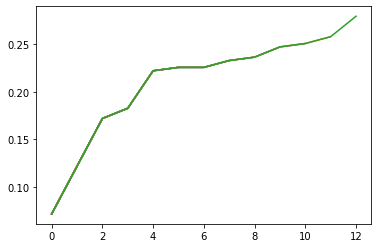

In [160]:
#constructing a visualisation for a hill climbing decision tree to see the progress more easily
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num), random_state=1)
minMaxNormalarr = []
for cur_f in range(0, col_num):
    
    new_Ind.append(col_Ind_Random[cur_f])
    A_train, A_test, D_train, D_test = train_test_split(test1[:, new_Ind],locationData, test_size=0.2, random_state=29)
    clf = DecisionTreeClassifier()
    fit = clf.fit(A_train, D_train)
    cur_Score = clf.score(A_test, D_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        minMaxNormalarr.append(cur_Score)
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        plt.plot(minMaxNormalarr)

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(beaconData,locationData,test_size=0.2,random_state=12)

In [162]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [163]:
y_pred = clf.predict(X_test)

In [164]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [165]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [166]:
accuracy

0.2616487455197133

In [167]:
#set of GridSearch algorithms testing Decision Tree hypertuning on differently manipulated data
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[4,6,8,12,14,16,18,20,22,24,26], 'criterion' :['gini', 'entropy'], 'max_features':[2,4,6,8,10,12,13]}
clfGrid = GridSearchCV(estimator=clf, param_grid=params)
clfGrid = clfGrid.fit(X_train, y_train)

C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [168]:
accuracy = clfGrid.best_score_
accuracy

0.33154228058936586

In [169]:
clfGrid.best_params_

{'criterion': 'gini', 'max_depth': 26, 'max_features': 8}

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardBeaconData,locationData,test_size=0.2,random_state=12)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.2616487455197133

In [171]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[4,6,8,12,14,16,18,20,22,24,26], 'criterion' :['gini', 'entropy'], 'max_features':[2,4,6,8,10,12,13]}
clfGrid = GridSearchCV(estimator=clf, param_grid=params)
clfGrid = clfGrid.fit(X_train, y_train)

C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [172]:
accuracy = clfGrid.best_score_
accuracy

0.33245115310698276

In [173]:
clfGrid.best_params_

{'criterion': 'gini', 'max_depth': 26, 'max_features': 10}

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardNormalBeaconData,locationData,test_size=0.2,random_state=12)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.25448028673835127

In [175]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[4,6,8,12,14,16,18,20,22,24,26], 'criterion' :['gini', 'entropy'], 'max_features':[2,4,6,8,10,12,13]}
clfGrid = GridSearchCV(estimator=clf, param_grid=params)
clfGrid = clfGrid.fit(X_train, y_train)

C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [176]:
accuracy = clfGrid.best_score_
accuracy

0.3225936899423446

In [177]:
clfGrid.best_params_

{'criterion': 'entropy', 'max_depth': 14, 'max_features': 10}

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(maxminBeaconData,locationData,test_size=0.2,random_state=12)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.2724014336917563

In [179]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[4,6,8,12,14,16,18,20,22,24,26], 'criterion' :['gini', 'entropy'], 'max_features':[2,4,6,8,10,12,13]}
clfGrid = GridSearchCV(estimator=clf, param_grid=params)
clfGrid = clfGrid.fit(X_train, y_train)

C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[Text(246.7308786205088, 213.0912, 'X[1] <= 0.819\ngini = 0.987\nsamples = 1116\nvalue = [1, 2, 12, 3, 3, 3, 15, 17, 16, 16, 18, 23, 21\n22, 7, 9, 3, 12, 17, 17, 23, 15, 23, 22, 5, 5\n8, 4, 8, 18, 29, 19, 18, 7, 8, 6, 9, 10, 12\n13, 17, 1, 2, 10, 7, 10, 9, 14, 9, 16, 10, 9\n13, 8, 10, 9, 10, 1, 8, 11, 20, 22, 10, 10, 6\n12, 10, 9, 7, 6, 4, 4, 15, 14, 20, 2, 10, 16\n12, 7, 13, 3, 12, 18, 20, 15, 15, 19, 16, 10\n3, 3, 1, 3, 10, 8, 4, 4, 10, 11, 9, 6, 4]'),
 Text(187.85931533051848, 204.3936, 'X[11] <= 0.925\ngini = 0.985\nsamples = 734\nvalue = [1, 2, 12, 3, 3, 3, 0, 2, 2, 2, 0, 0, 11, 15\n7, 9, 3, 2, 0, 0, 0, 0, 2, 18, 5, 4, 8, 4\n0, 6, 0, 2, 10, 7, 8, 4, 7, 0, 4, 6, 15, 1\n2, 10, 7, 10, 9, 4, 7, 14, 9, 9, 13, 0, 10\n9, 10, 1, 8, 11, 4, 22, 10, 10, 5, 12, 4, 9\n7, 6, 4, 4, 15, 9, 18, 2, 10, 16, 12, 7, 13\n3, 12, 18, 20, 15, 15, 19, 16, 10, 3, 3, 1, 3\n10, 8, 4, 4, 10, 11, 9, 6, 4]'),
 Text(186.83487471089714, 195.696, 'X[8] <= 0.852\ngini = 0.985\nsamples = 722\nvalue = [1, 2, 12, 3, 3,

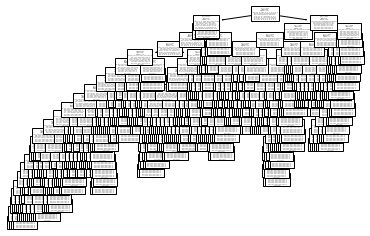

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(maxminBeaconData,locationData,test_size=0.2,random_state=12)
clf = DecisionTreeClassifier(max_depth=24, max_features=8)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

feature_names=['b3001','b3002','b3003','b3004','b3005','b3006','b3007','b3008','b3009','b3010','b3011','b3012','b3013']

#graphviz for better visual of decision tree
from sklearn import tree
with open('decision_tree.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file= f, class_names=locationData, feature_names=feature_names, filled=True, rounded=True, special_characters=True)


#tree, not usable
tree.plot_tree(clf)

C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least

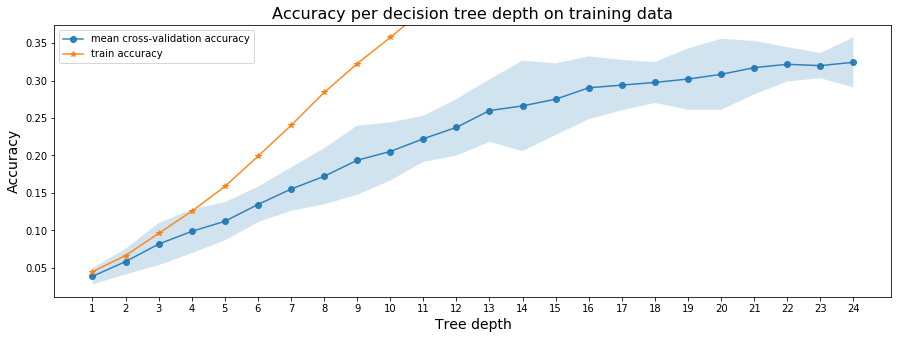

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [182]:
accuracy = clfGrid.best_score_
accuracy

0.32347053171044204

In [183]:
clfGrid.best_params_

{'criterion': 'gini', 'max_depth': 24, 'max_features': 12}

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minMaxNormalBeaconData,locationData,test_size=0.2,random_state=12)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.24014336917562723

In [185]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[4,6,8,12,14,16,18,20,22,24,26], 'criterion' :['gini', 'entropy'], 'max_features':[2,4,6,8,10,12,13]}
clfGrid = GridSearchCV(estimator=clf, param_grid=params)
clfGrid = clfGrid.fit(X_train, y_train)

C:\Users\total\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [186]:
accuracy = clfGrid.best_score_
accuracy

0.31631966688020496

In [187]:
clfGrid.best_params_

{'criterion': 'gini', 'max_depth': 24, 'max_features': 6}

In [188]:
stdNormalArr

[0.07168458781362007,
 0.12186379928315412,
 0.16487455197132617,
 0.1827956989247312,
 0.21863799283154123,
 0.22580645161290322,
 0.22580645161290322,
 0.22939068100358423,
 0.23655913978494625,
 0.25448028673835127,
 0.25806451612903225,
 0.26881720430107525]

In [189]:
minMaxNormalarr

[0.07168458781362007,
 0.12186379928315412,
 0.17204301075268819,
 0.1827956989247312,
 0.2222222222222222,
 0.22580645161290322,
 0.22580645161290322,
 0.23297491039426524,
 0.23655913978494625,
 0.24731182795698925,
 0.25089605734767023,
 0.25806451612903225,
 0.27956989247311825]

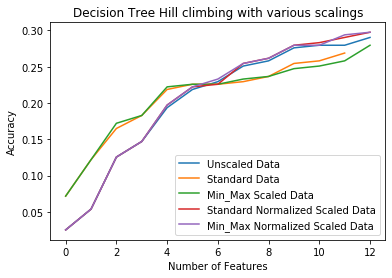

In [190]:
#line plot to see comparison of different manipulation combinations for DT and HC
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

y = beaconArr
z = stdArr
a = minmaxArr
b = stdNormalArr
c = minMaxNormalarr

fig, ax = plt.subplots()

ax.plot(a)
ax.plot(b)
ax.plot(c)
ax.plot(y)
ax.plot(z)
ax.plot


ax.set_title('Decision Tree Hill climbing with various scalings')
ax.legend(['Unscaled Data', 'Standard Data','Min_Max Scaled Data', 'Standard Normalized Scaled Data', 'Min_Max Normalized Scaled Data'])
ax.xaxis.set_label_text('Number of Features')
ax.yaxis.set_label_text('Accuracy')

                        
plt.show()

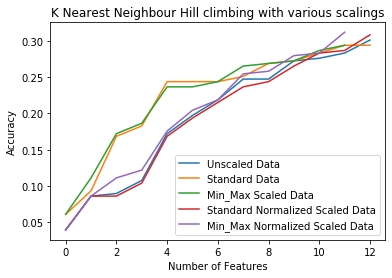

In [191]:
#line plot to see comparison of different manipulation combinations for KNN and HC
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, inlcude:
%matplotlib inline

y = KNNbeaconArr
z = KNNstdArr
a = KNNminArr
b = KNNstdNormalArr
c = KNNminNormalArr


fig, ax = plt.subplots()

ax.plot(a)
ax.plot(b)
ax.plot(c)
ax.plot(y)
ax.plot(z)
ax.plot


ax.set_title('K Nearest Neighbour Hill climbing with various scalings')
ax.legend(['Unscaled Data', 'Standard Data','Min_Max Scaled Data', 'Standard Normalized Scaled Data', 'Min_Max Normalized Scaled Data'])
ax.xaxis.set_label_text('Number of Features')
ax.yaxis.set_label_text('Accuracy')

                        
plt.show()

Text(0.5, 1.0, 'Accuracy without any feature Hypertuning')

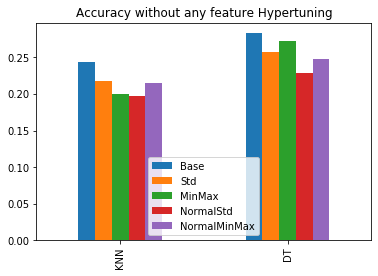

In [192]:
#Accuracy bar chart for base data with no hypertuning or feature selection
from matplotlib.ticker import FuncFormatter

KNNData = [0.24372759856630824, 0.21830985915492956, 0.2007168458781362, 0.1971326164874552, 0.21505376344086022]
unscaledData = [0.24372759856630824, 0.2831541218637993]
stdScaledData = [0.21830985915492956, 0.25806451612903225]
minMaxScaledData = [0.2007168458781362, 0.2724014336917563]
normalStdData = [0.1971326164874552, 0.22939068100358423]
normalMinMaxData = [0.21505376344086022, 0.24731182795698925]
DTData = [0.2831541218637993, 0.25806451612903225, 0.2724014336917563, 0.22939068100358423, 0.24731182795698925]

index = ['KNN', 'DT']

bar = pd.DataFrame({'Base': unscaledData,
                    'Std': stdScaledData,
                    'MinMax': minMaxScaledData,
                    'NormalStd': normalStdData,
                    'NormalMinMax': normalMinMaxData}, index=index)


ax = bar.plot.bar()
ax.set_title("Accuracy without any feature Hypertuning")

Text(0.5, 1.0, 'Accuracy using GridSearch')

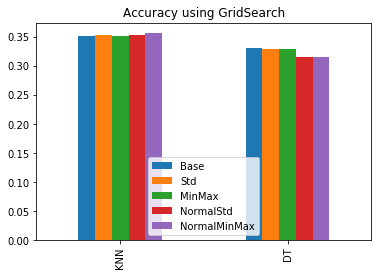

In [193]:
#Accuracy bar chart for base data with hypertuning
from matplotlib.ticker import FuncFormatter

unscaledDataGS = [0.35214768339768343, 0.3306654388212684]
stdScaledDataGS = [0.3539253539253539, 0.3288637091607944]
minMaxScaledDataGS = [0.3512226512226512, 0.32976057014734145]
normalStdDataGS = [0.3530405405405405, 0.31541079436258807]
normalMinMaxDataGS = [0.3566361003861004, 0.31541479820627805]

index = ['KNN', 'DT']

bar = pd.DataFrame({'Base': unscaledDataGS,
                    'Std': stdScaledDataGS,
                    'MinMax': minMaxScaledDataGS,
                    'NormalStd': normalStdDataGS,
                    'NormalMinMax': normalMinMaxDataGS}, index=index)

ax = bar.plot.bar()
ax.set_title("Accuracy using GridSearch")